# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Theme  : Recherche de lemmes clefs


---

## Observations et environnement
---

In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [2]:
import importlib
import pandas as pd
import seaborn as sns

### Chargement des données

In [3]:
article_filename = ''

In [4]:
import patat.db.article_db
article_db = patat.db.article_db.ArticleDb(article_filename)
article_db.df()

,url,title,article,site,author,date_iso,url_h,c_count
0,https://reseauinternational.net/tous-les-jeune...,"Tous les jeunes, portez la nouvelle (russe)",par Pepe Escobar.\nL’OCS à Samarcande et l’Ass...,reseauinternational.net,NaN,2022-09-30T00:00:00,f95a294c94ff76cc9626ae06300a8b38067f89cf,10366.0
1,https://reseauinternational.net/adhesion-a-la-...,Adhésion à la Russie : 93% pour le « oui » dan...,"Dans les régions de Zaporijia et de Kherson, 9...",reseauinternational.net,NaN,2022-09-30T00:00:00,c924dab7ded47578d81c3ae46f8be0964b3c50f1,1607.0
2,https://lemediaen442.fr/onu-le-premier-ministr...,ONU – Le Premier ministre de Nouvelle-Zélande ...,L’argument principal de la ministre est que le...,lemediaen442.fr,NaN,2022-09-29T00:00:00,3d47a59ef99274fd9ee96c209cc2ab41d6e1f6bb,1444.0
3,https://www.francesoir.fr/societe-environnemen...,Compostage humain: les “funérailles vertes” ga...,"Aux États-Unis, les différents gouvernements r...",www.francesoir.fr,Auteur(s)\nFranceSoir,2022-09-28T13:15:00,0c0341a1f5fae820ee307cb54024df6b06a93d85,4040.0
4,https://www.breizh-info.com/2022/09/27/208410/...,Donatello : génie de la Renaissance,"Portrait du sculpteur Donatello (1386-1466), p...",www.breizh-info.com,NaN,2022-09-27T00:00:00,fcce819327d0302c4cf5e3a8a43b54327ffb8e63,1145.0
...,...,...,...,...,...,...,...,...
77906,https://www.lelibrepenseur.org/une-histoire-vi...,Une histoire vieille comme le monde !,Certains veulent des preuves ! Ils ont raison....,www.lelibrepenseur.org,Par\nAdmin,2010-05-04T00:00:00,8c7a6ecf46d47da1912884a0c0a2837c69f7ad19,NaN
77907,https://www.lelibrepenseur.org/actus/,Actus,"Dernière vidéo !\nIl était temps, enfin ! Je v...",www.lelibrepenseur.org,Par\nuser,2007-07-07T00:00:00,d4d5a37a8ff545664bea75664c8d8695e70d0941,NaN
77908,https://www.lelibrepenseur.org/affiche-des-dec...,Affiche des décès et malaises de sportifs de h...,Un nombre inquiétant de sportifs de haut nivea...,www.lelibrepenseur.org,NaN,NaN,a175027896cf79e76dfad6409694fafacf1919b3,NaN
77909,https://www.lelibrepenseur.org/communaute/,Communauté,Notre Réseau Telegram et ses Groupes Secondair...,www.lelibrepenseur.org,NaN,NaN,6ba257c7b15dd68cadf7dc5d6d8c584db0f1792e,NaN


## Expérience
---

In [5]:
df_corpus =article_db.df().copy()

### texte = titre + article en minuscules

In [6]:
df_corpus['text'] = df_corpus['title'] + '\n' + df_corpus['article']

In [7]:
df_corpus['text'] = df_corpus['text'].apply(str.lower)

### Suppression Articles courts et longs

In [8]:
df_corpus['c_count'] = df_corpus['text'].apply(len)

In [9]:
df_corpus = df_corpus[df_corpus['c_count']<20000]

In [10]:
df_corpus = df_corpus[df_corpus['c_count']>=500]

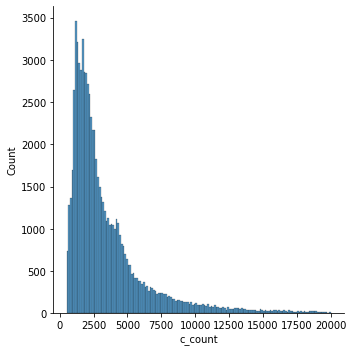

In [11]:
sns.displot(df_corpus,x='c_count')

In [12]:
df_corpus.shape

(76602, 9)

### Lemmatization Corpus

In [13]:
from patat.ml.lex_analyser import LexAnalyser

In [14]:
lex = LexAnalyser()

In [15]:
df_corpus['w_list'] = df_corpus['text'].apply(lex.get_words).copy()

In [16]:
df_corpus['l_list'] = df_corpus['w_list'].apply(lex.get_lemmas).copy()

In [17]:
df_corpus['w_count'] = df_corpus['w_list'].apply(len) 

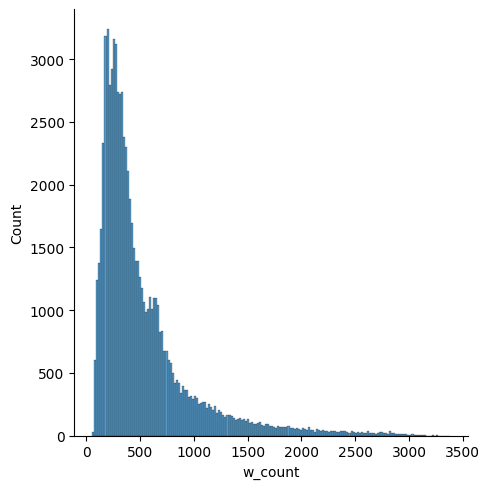

In [18]:
sns.displot(df_corpus,x='w_count')

### Choix du thème et des mots associés

#### Covid

In [ ]:
theme_lemmas = lex.get_lemmas(['covid','vaccin','vaccination'])

In [58]:
theme_lemmas = lex.get_lemmas(['ukraine','ukrainien','russie','russe','poutine','guerre','otan'])

In [59]:
theme_lemmas

['ukraine', 'ukrainien', 'russie', 'russe', 'poutine', 'guerre', 'otan']

### theme_score

In [60]:
def theme_score(lemmas: list):
    score = 0
    for lemma in theme_lemmas:
        score = score + lemmas.count(lemma)
    return score

In [61]:
df_corpus['theme_score'] = df_corpus['l_list'].apply(theme_score)

In [62]:
df_corpus.sort_values('theme_score',ascending=False).head()

,url,title,article,site,author,date_iso,url_h,c_count,text,w_list,l_list,w_count,theme_score,theme
17619,https://www.wikistrike.com/2022/02/breaking-ne...,"Guerre en Ukraine, le grand live du jour où le...",LIVE\nGuerre en Ukraine \n\n22 H 38\nL'Ukraine...,www.wikistrike.com,NaN,2022-02-24T00:00:00,6260be74171e9bfd9ec0795efb1ecf0bfc721a5b,17741,"guerre en ukraine, le grand live du jour où le...","[guerre, en, ukraine, le, grand, live, du, jou...","[guerre, en, ukraine, le, grand, live, du, jou...",2370,173,1
56307,https://fr.sott.net/article/40029-Guerre-en-Uk...,Guerre en Ukraine: les seize preuves de l'enti...,Afin de développer un politique de classe prol...,fr.sott.net,NaN,NaN,1479391f947cdbe4a741d0c3129154c3df9e5135,14843,guerre en ukraine: les seize preuves de l'enti...,"[guerre, en, ukraine, les, seize, preuves, de,...","[guerre, en, ukraine, les, seize, preuve, de, ...",2208,147,1
11794,https://www.wikistrike.com/2022/05/livraison-d...,Livraison d’armes à l’Ukraine: Qu’est-ce qui s...,Pourquoi l’Allemagne envoie-t-elle des armes à...,www.wikistrike.com,NaN,2022-05-22T00:00:00,788494ef1f4c1d74ad40c37b7d38144115c50635,18626,livraison d’armes à l’ukraine: qu’est-ce qui s...,"[livraison, armes, ukraine, qu, est, ce, qui, ...","[livraison, arme, ukraine, qu, est, ce, qui, s...",2828,144,1
56310,https://fr.sott.net/article/40032-C-est-quoi-l...,C'est quoi le problème avec l'Allemagne ?,Pourquoi l'Allemagne envoie-t-elle des armes à...,fr.sott.net,NaN,NaN,156b20782830aa2ac601c6a92c8f7a69f93ca228,18468,c'est quoi le problème avec l'allemagne ?\npou...,"[est, quoi, le, problème, avec, allemagne, pou...","[est, quoi, le, problème, avec, allemagne, pou...",2786,143,1
5516,https://theconversation.com/comment-la-guerre-...,Comment la guerre menace le riche patrimoine a...,La guerre menée depuis le 24 févier 2022 par M...,theconversation.com,Thibaut Castelli,2022-08-17T19:45:00,7ad30bb7d1307533a857ab4cb5a00e6ceab11181,19253,comment la guerre menace le riche patrimoine a...,"[comment, la, guerre, menace, le, riche, patri...","[comment, la, guerre, menace, le, riche, patri...",2897,138,1


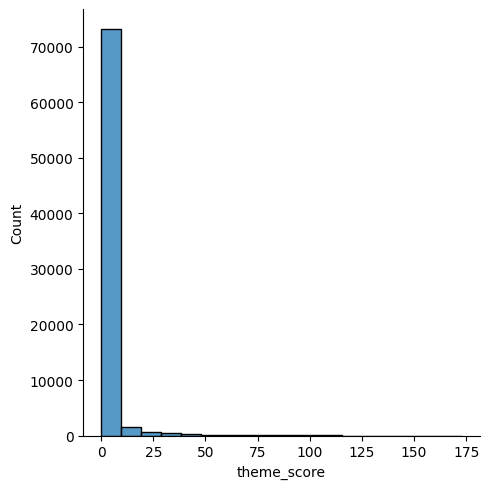

In [63]:
sns.displot(df_corpus,x='theme_score')

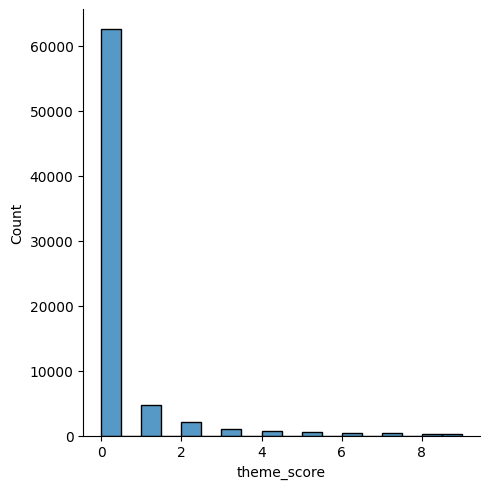

In [64]:
sns.displot(df_corpus[df_corpus['theme_score']<10],x='theme_score')

In [65]:
# Seuil à partir duquel on considère que l'article est dans le thème
score_threshold = 1
#score_threshold = 2

In [66]:
df_corpus['theme']=df_corpus['theme_score'].apply(lambda s : 1 if s>=score_threshold else 0)

### Reduction corpus

In [67]:
df_0 = df_corpus[df_corpus['theme']==0].sample(3000, random_state=42)
df_1 = df_corpus[df_corpus['theme']==1].sample(3000, random_state=42)
df_light = pd.concat([df_0,df_1]).copy()

### Recherche de Lemmes Communs

In [68]:
%%time
df_light['l_text'] = df_light['l_list'].apply(' '.join)

CPU times: user 102 ms, sys: 4.88 ms, total: 107 ms
Wall time: 108 ms


In [69]:
%%time
lemmas_0 = []
lemmas_1 = []
for index,row in df_light.iterrows():
    if row['theme']>0 :
        lemmas_1 = lemmas_1 + row['l_list']
    else:
        lemmas_0 = lemmas_0 + row['l_list']        

CPU times: user 19.4 s, sys: 3.11 s, total: 22.5 s
Wall time: 22.6 s


In [70]:
%%time
lemmas_0 = df_light[df_light['theme']==0]['l_list'].sum()
lemmas_1 = df_light[df_light['theme']==1]['l_list'].sum()

CPU times: user 19 s, sys: 3.03 s, total: 22 s
Wall time: 22 s


In [71]:
ignore_words = lex.get_ignore_words(lemmas_0, lemmas_1, common_size=200)
len(ignore_words)

47433

In [72]:
common_words = lex.get_common_words(lemmas_0, lemmas_1, common_size=200)
common_words

['de',
 'la',
 'le',
 'les',
 'et',
 'des',
 'en',
 'un',
 'est',
 'une',
 'du',
 'avoir',
 'être',
 'pour',
 'que',
 'dans',
 'il',
 'qui',
 'sur',
 'par',
 'au',
 'pas',
 'ce',
 'plaire',
 'faire',
 'qu',
 'pouvoir',
 'ne',
 'se',
 'avec',
 'on',
 'son',
 'été',
 'mais',
 'ou',
 'tout',
 'aux',
 'cette',
 'nous',
 'vous',
 'elle',
 'comme',
 'an',
 'même',
 'ces',
 'sa',
 'aussi',
 'france',
 'autre',
 'ils',
 'je',
 'leur',
 'ses',
 'devoir',
 'si',
 'premier',
 'deux',
 'après',
 'aller',
 'nouveau',
 'mettre',
 'dire',
 'personne',
 'voir',
 'bien',
 'grand',
 'depuis',
 'the',
 'sans',
 'très',
 'prendre',
 'selon',
 'entre',
 'dernier',
 'français',
 'lui',
 'contre',
 'année',
 'jour',
 'alors',
 'tous',
 'encore',
 'où',
 'certain',
 'donc',
 'donner',
 'non',
 'monde',
 'avant',
 'leurs',
 'moins',
 'sou',
 'pays',
 'dont',
 'cela',
 'public',
 'falloir',
 'fois',
 'venir',
 'homme',
 'ainsi',
 'notre',
 'état',
 'vouloir',
 'expliquer',
 'peu',
 'savoir',
 'droit',
 'égaleme

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [74]:
def display_wc(text,commonwords):
    wordcloud = WordCloud(background_color = 'white', stopwords = commonwords, max_words = 50, regexp=r"\w\w+").generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show();

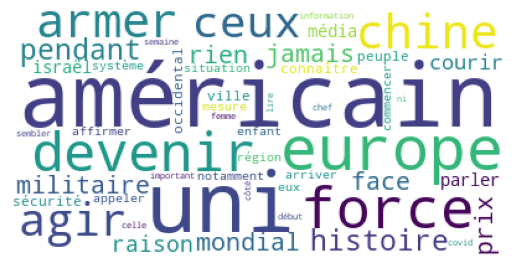

In [75]:
display_wc('\n'.join(df_light[df_light['theme']==1]['l_text']),ignore_words+theme_lemmas)

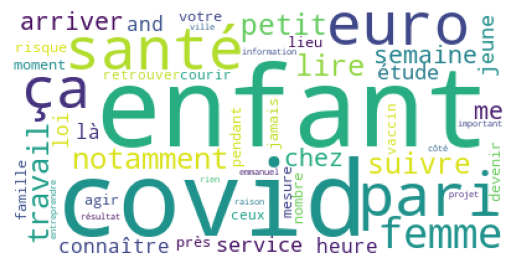

In [76]:
display_wc('\n'.join(df_light[df_light['theme']==0]['l_text']),ignore_words)

In [77]:
df_agg = df_light.pivot_table(values='l_text',columns='theme',aggfunc=sum)

In [78]:
from collections import Counter

In [79]:
count_0 = Counter(lex.get_lemmas_from_text(df_agg[0][0]))

In [80]:
count_1 = Counter(lex.get_lemmas_from_text(df_agg[1][0]))

In [81]:
df_count = pd.concat([pd.DataFrame.from_dict(count_0, orient='index'),pd.DataFrame.from_dict(count_1, orient='index', columns=[1])],axis=1)

In [82]:
# drop common words
df_count = df_count.drop(index=common_words)

In [83]:
df_count = df_count.fillna(0)

In [84]:
df_count = df_count[(df_count[0]>3)&(df_count[1]>3)]

In [85]:
df_count.sort_values(1,ascending=False).head(30)

,0,1
américain,638.0,3712.0
uni,607.0,3635.0
militaire,186.0,2435.0
armer,181.0,2264.0
europe,480.0,2233.0
force,445.0,2224.0
mondial,389.0,1965.0
devenir,682.0,1716.0
occidental,79.0,1656.0
arme,191.0,1635.0


## Mesure et observation des résultats
---

In [86]:
df_light[df_light['theme']==1]

,url,title,article,site,author,date_iso,url_h,c_count,text,w_list,l_list,w_count,theme_score,theme,l_text
61126,https://lezarceleurs.blogspot.com/2022/09/la-r...,La Russie menace de détruire les satellites St...,De : https://www.naturalnews.com/2022-09-25-sp...,lezarceleurs.blogspot.com,NaN,NaN,8cdbab7c5de3c8779c792d44e3668a2b8be31c7a,5393,la russie menace de détruire les satellites st...,"[la, russie, menace, de, détruire, les, satell...","[la, russie, menace, de, détruire, les, satell...",767,36,1,la russie menace de détruire les satellite sta...
36168,https://www.francetvinfo.fr/replay-radio/nouve...,Nouveau monde. Google accusé de piller des con...,Google est accusé par un site de paroles de ch...,www.francetvinfo.fr,franceinfo - Jérôme Colombain,2019-06-25T16:25:00,dd132a29305fc57bf6fb623dcadc727ea8301a36,4532,nouveau monde. google accusé de piller des con...,"[nouveau, monde, google, accusé, de, piller, d...","[nouveau, monde, google, accuser, de, piller, ...",713,1,1,nouveau monde google accuser de piller des con...
71690,https://www.polemia.com/goldman-sachs-crise-ec...,"Selon Goldman Sachs, la crise économique est i...","Par Olivier Piacentini, essayiste ♦ Dans une r...",www.polemia.com,NaN,NaN,0a296acf4a5d88a38cf6dbe79417a655a1db6e0a,7276,"selon goldman sachs, la crise économique est i...","[selon, goldman, sachs, la, crise, économique,...","[selon, goldman, sachs, la, crise, économique,...",1095,4,1,selon goldman sachs la crise économique est im...
46283,https://www.wikistrike.com/2015/10/exclusivite...,Egypte - Vidéo de l'attentat sur l'A321 russe ...,Vidéo exclusive de l'Airbus A321-231 (EI-ETJ) ...,www.wikistrike.com,NaN,2015-10-31T00:00:00,ef122acf341b7cd1c5a2af244a912f029d445697,1523,egypte - vidéo de l'attentat sur l'a321 russe ...,"[egypte, vidéo, de, attentat, sur, russe, par,...","[egypte, vidéo, de, attentat, sur, russe, par,...",235,6,1,egypte vidéo de attentat sur russe par etat is...
69333,https://www.francesoir.fr/politique-monde/un-c...,Un couple illégitime à la Maison-Blanche ?,"Connu pour ses bafouilles, Joe Robinette Biden...",www.francesoir.fr,NaN,NaN,222eedcb5bcbc783d618a4b8051e04238e2426a5,14463,un couple illégitime à la maison-blanche ?\nco...,"[un, couple, illégitime, la, maison, blanche, ...","[un, couple, illégitime, la, maison, blanc, co...",2202,5,1,un couple illégitime la maison blanc connaître...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74128,https://www.profession-gendarme.com/militaire-...,Militaire soupçonné de trahison : « Nous avons...,"Florence Parly, la ministre des Armées, était ...",www.profession-gendarme.com,NaN,NaN,7d70385b4cafd6e2c9f1f61a838ce403bfb31bf4,1100,militaire soupçonné de trahison : « nous avons...,"[militaire, soupçonné, de, trahison, nous, avo...","[militaire, soupçonner, de, trahison, nous, av...",157,3,1,militaire soupçonner de trahison nous avoir pr...
4707,https://www.breizh-info.com/2022/08/25/206992/...,Communisme. Goulag – Une histoire soviétique,Le Goulag est le système concentrationnaire de...,www.breizh-info.com,NaN,2022-08-25T00:00:00,43a1d415d7d6c9bf39f8cd799e0a71048a5e0f07,6836,communisme. goulag – une histoire soviétique\n...,"[communisme, goulag, une, histoire, soviétique...","[communisme, goulag, une, histoire, soviétique...",979,9,1,communisme goulag une histoire soviétique le g...
30721,https://www.dreuz.info/2020/12/projet-daide-au...,« Projet d’aide aux Américains touchés par le ...,Après avoir rejeté pendant des mois un projet ...,www.dreuz.info,Publié par Pierre Rehov le 23 décembre 2020,2020-12-23T00:00:00,23946d6e0e988946b2d2434edf79f70bbedb7e4b,4706,« projet d’aide aux américains touchés par le ...,"[projet, aide, aux, américains, touchés, par, ...","[projet, aide, aux, américain, toucher, par, l...",713,1,1,projet aide aux américain toucher par le covid...
67819,https://www.francesoir.fr/opinions-tribunes/le...,Le discours courageux du professeur Peyromaure,En un temps où il est si commode pour trop de ...,www.fran

## Sauvegarde des résultats
---

## Conclusions
---

- Résultat : OK

## Bricolages
---

In [ ]:
df = df_corpus.sample(10000, random_state=42).copy()

In [ ]:
%%time
text = df['l_text'].sum()

In [ ]:
df_1 = df_corpus[df_corpus['theme']==1]

In [ ]:
df_1.shape

In [ ]:
%%time
text = df_1['l_text'].sum()

In [ ]:
text_1 = text

In [ ]:
df_0 = df_corpus[df_corpus['theme']==0].sample(8000, random_state=42)

In [ ]:
%%time
text_0 = df_0['l_text'].sum()

In [ ]:
lemmas_0 = lex.get_words(text_0)

In [ ]:
lemmas_1 = lex.get_words(text_1)

In [ ]:
ignore_words = lex.get_ignore_words(lemmas_0,lemmas_1)

In [ ]:
len(ignore_words)

In [ ]:
ignore_words[-500:]

In [ ]:
df_corpus[df_corpus['text'].str.contains(r"drouâte")]

In [ ]:
df_corpus['text'][72485]

In [ ]:
import patat.util.file

In [ ]:
patat.util.file.text_save('\n'.join(ignore_words),'data/tmp/221018-IgnoreWords.csv')

In [ ]:
%%time
all_text = df_corpus['text'].sum()